## Predicting Survival on the Titanic

### History
Perhaps one of the most infamous shipwrecks in history, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 people on board. Interestingly, by analysing the probability of survival based on few attributes like gender, age, and social status, we can make very accurate predictions on which passengers would survive. Some groups of people were more likely to survive than others, such as women, children, and the upper-class. Therefore, we can learn about the society priorities and privileges at the time.

### Assignment:

Build a Machine Learning Pipeline, to engineer the features in the data set and predict who is more likely to Survive the catastrophe.

Follow the Jupyter notebook below, and complete the missing bits of code, to achieve each one of the pipeline steps.

In [1]:
import re

# to handle datasets
import pandas as pd
import numpy as np

# for visualization
import matplotlib.pyplot as plt

# to divide train and test set
from sklearn.model_selection import train_test_split

# feature scaling
from sklearn.preprocessing import StandardScaler

# to build the models
from sklearn.linear_model import LogisticRegression

# to evaluate the models
from sklearn.metrics import accuracy_score, roc_auc_score

# to persist the model and the scaler
import joblib

# omd
import re

# to visualise al the columns in the dataframe
pd.pandas.set_option('display.max_columns', None)

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


## Prepare the data set

In [2]:
# load the data - it is available open source and online

data = pd.read_csv('https://www.openml.org/data/get_csv/16826755/phpMYEkMl')

# display data
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,?,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22 C26,S,11,?,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22 C26,S,?,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22 C26,S,?,?,"Montreal, PQ / Chesterville, ON"


### Data dictionary from Kaggle's website 
source: https://www.kaggle.com/competitions/titanic/data 
| Variable | Definition | Key                         |
|----------|------------|-----------------------------|
| survivial | Survival  | 0=No, 1=Yes                 |
| pclass | Ticket class | 1=1st, 2=2nd, 3=3rd         |
| sex    | Sex          |                             | 
| Age    | Age in years |                             |
| sibsp  | # of siblings / spouses aboard the Titanic |
| parch  | # of parents / children abooard the Titanic|
| ticket | Ticket number |                            | 
| fare   | Passenger fare|                            |
| cabin  | Cabin number  |                            |
| embarked | Port of Embarkation | C = Cherbourg, Q = Queenstown, S = Southamption |

In [3]:
# replace question marks by NaN values

data = data.replace('?', np.nan)

In [4]:
# omd 
data['cabin'] = [i.split()[0] if pd.notna(i) else np.nan for i in data['cabin']]
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


In [5]:
# retain only the first cabin if more than
# 1 are available per passenger

def get_first_cabin(row):
    try:
        return row.split()[0]
    except:
        return np.nan
    
data['cabin'] = data['cabin'].apply(get_first_cabin)

In [6]:
# extracts the title (Mr, Ms, etc) from the name variable

def get_title(passenger):
    line = passenger
    if re.search('Mrs', line):
        return 'Mrs'
    elif re.search('Mr', line):
        return 'Mr'
    elif re.search('Miss', line):
        return 'Miss'
    elif re.search('Master', line):
        return 'Master'
    else:
        return 'Other'
    
data['title'] = data['name'].apply(get_title)

In [7]:
# omd
data['title_v2'] = data['name'].str.extract(',\s*([A-Za-z]+)\.', expand=False)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,title_v2
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,Mrs


### ChatGPT
The titles "Miss," "Mrs," "Ms," and "Mlle" are different honorifics used to address or refer to women, and they carry different cultural and marital status connotations:

**Miss**: Typically used to address an unmarried woman or a girl. It does not specify whether the woman is in a relationship or not.

**Mrs**: Used to address a married woman. It traditionally indicates that the woman is married and has taken her husband's last name. For example, "Mrs. Smith."

**Ms**: Introduced as a neutral alternative to "Miss" and "Mrs," "Ms" doesn't specify marital status. It can be used for women regardless of their marital status, and it's often used when the person's marital status is unknown or when the individual prefers not to disclose it. For example, "Ms. Johnson."

**Mlle**: This is the French equivalent of "Miss" and is used to address an unmarried woman or a girl in French-speaking regions. It is similar in usage to "Miss" in English.  

**Mme**: This is the French equivalent of "Mrs" and is used to address a married woman in French-speaking regions.  

The choice of which title to use can depend on cultural norms, personal preferences, and regional conventions. In modern usage, "Ms" is often preferred for its neutrality and inclusivity.

In [8]:
# omd 
pd.pivot_table(data=data,
               index=['title', 'title_v2'],
               values='survived',
               aggfunc=['count', 'mean'],
               dropna=True,
               margins=True)

count      mean
                survived  survived
title  title_v2                   
Master Master         61  0.508197
Miss   Miss          258  0.678295
Mr     Mr            757  0.162483
       Sir             1  1.000000
Mrs    Lady            1  1.000000
       Miss            2  0.500000
       Mlle            1  1.000000
       Mrs           197  0.786802
Other  Capt            1  0.000000
       Col             4  0.500000
       Don             1  0.000000
       Dona            1  1.000000
       Dr              8  0.500000
       Jonkheer        1  0.000000
       Major           2  0.500000
       Mlle            1  1.000000
       Mme             1  1.000000
       Ms              2  0.500000
       Rev             8  0.000000
All                 1308  0.381498

In [9]:
# omd 
data[data['title_v2']=='Mme']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,title_v2
12,1,1,"Aubart, Mme. Leontine Pauline",female,24,0,0,PC 17477,69.3,B35,C,9,NaN,"Paris, France",Other,Mme


In [10]:
# omd 
data[data['title_v2']=='Ms']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,title_v2
546,2,1,"Reynaldo, Ms. Encarnacion",female,28,0,0,230434,13,NaN,S,9,NaN,Spain,Other,Ms
1076,3,0,"O'Donoghue, Ms. Bridget",female,NaN,0,0,364856,7.75,NaN,Q,NaN,NaN,NaN,Other,Ms


In [11]:
# omd 
data[data['title_v2']=='Mlle']

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,title_v2
199,1,1,"Mayne, Mlle. Berthe Antonine ('Mrs de Villiers')",female,24,0,0,PC 17482,49.5042,C90,C,6,NaN,"Belgium Montreal, PQ",Mrs,Mlle
255,1,1,"Sagesser, Mlle. Emma",female,24,0,0,PC 17477,69.3,B35,C,9,NaN,NaN,Other,Mlle


In [12]:
# omd 
# after researching titles with ChatGPT, 
def title_category(title):
    if title not in ['Master', 'Mrs', 'Miss', 'Mr']:
        if title == 'Mlle':
            return 'Miss' 
        elif title == 'Ms':
            return 'Mrs' 
        elif title == 'Mme':
            return 'Mrs' 
        else:
            return 'Other'
    else:
        return title

In [13]:
# omd 
data['title_v3'] = data.apply(lambda x: title_category(x['title_v2']), axis=1)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title,title_v2,title_v3
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss,Miss,Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master,Master,Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss,Miss,Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr,Mr,Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs,Mrs,Mrs


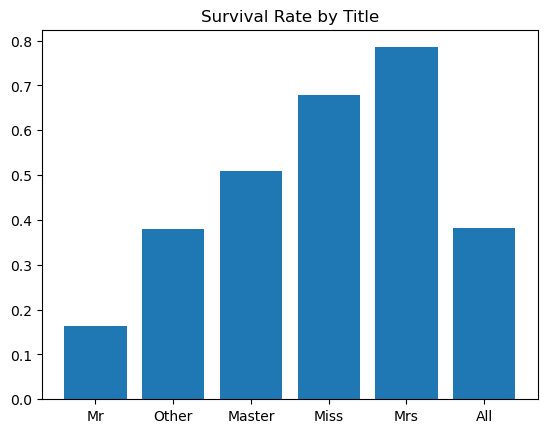

In [14]:
pt = pd.pivot_table(data=data,
               index=['title_v3'],
               values='survived',
               aggfunc=['count', 'mean'],
               dropna=True,
               margins=True)
custom_order = ['Mr', 'Other', 'Master', 'Miss', 'Mrs', 'All']
pt = pt.reindex(custom_order)
pt.columns = ['count', 'surv_rate']
pt.columns = ['count', 'surv_rate']
plt.title('Survival Rate by Title')
plt.bar(x=pt.index, height=pt.surv_rate);

In [15]:
# omd 
# combine all changes to one function so that it can be used for the ML pipeline
def title_trnsf(name):
    pattern = ',\s*([A-Za-z]+)\.'
    match = re.search(pattern, name)
    if match:
        title = match.group(1)
    else:
        title = 'Missing'
    if title not in ['Master', 'Mrs', 'Miss', 'Mr']:
        if title == 'Mlle':
            return 'Miss' 
        elif title == 'Ms':
            return 'Mrs' 
        elif title == 'Mme':
            return 'Mrs' 
        else:
            return 'Other'
    else:
        return title

In [16]:
data['title'] = data.apply(lambda x: title_trnsf(x['name']), axis=1)
data.drop(columns=['title_v2', 'title_v3'], axis=1,inplace=True)
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest,title
0,1,1,"Allen, Miss. Elisabeth Walton",female,29,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO",Miss
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.55,C22,S,11,NaN,"Montreal, PQ / Chesterville, ON",Master
2,1,0,"Allison, Miss. Helen Loraine",female,2,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Miss
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30,1,2,113781,151.55,C22,S,NaN,135,"Montreal, PQ / Chesterville, ON",Mr
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25,1,2,113781,151.55,C22,S,NaN,NaN,"Montreal, PQ / Chesterville, ON",Mrs


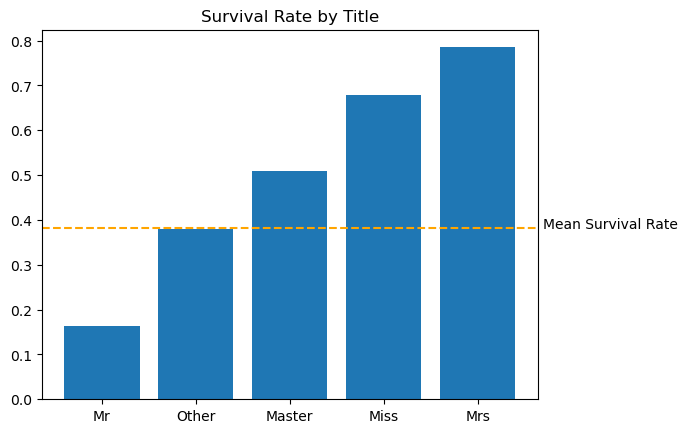

In [17]:
# omd
pt = pd.pivot_table(data=data,
               index=['title'],
               values='survived',
               aggfunc=['count', 'mean'],
               dropna=True)
custom_order = ['Mr', 'Other', 'Master', 'Miss', 'Mrs']
pt = pt.reindex(custom_order)
pt.columns = ['count', 'surv_rate']
pt.columns = ['count', 'surv_rate']
plt.title('Survival Rate by Title')
plt.axhline(y=np.mean(data['survived']), color='orange', ls='--')
plt.text(x=4.7, y=np.mean(data['survived']), s='Mean Survival Rate')
plt.bar(x=pt.index, height=pt.surv_rate);

In [18]:
# cast numerical variables as floats

data['fare'] = data['fare'].astype('float')
data['age'] = data['age'].astype('float')

In [19]:
# drop unnecessary variables

data.drop(labels=['name','ticket', 'boat', 'body','home.dest'], axis=1, inplace=True)

# display data
data.head()

,pclass,survived,sex,age,sibsp,parch,fare,cabin,embarked,title
0,1,1,female,29.0000,0,0,211.3375,B5,S,Miss
1,1,1,male,0.9167,1,2,151.5500,C22,S,Master
2,1,0,female,2.0000,1,2,151.5500,C22,S,Miss
3,1,0,male,30.0000,1,2,151.5500,C22,S,Mr
4,1,0,female,25.0000,1,2,151.5500,C22,S,Mrs


In [20]:
# save the data set

data.to_csv('titanic.csv', index=False)

## Data Exploration

### Find numerical and categorical variables

In [21]:
target = 'survived'

In [22]:
# omd 
vars_num = [var for var in data.columns if data[var].dtype != 'object' and var != 'survived']
vars_cat = [var for var in data.columns if var not in vars_num and var != 'survived']
print(f"Number of numerical variables: {len(vars_num):,.0f} ({str(vars_num)[1:-1]})")
print(f"Number of categorical variables: {len(vars_cat):,.0f} ({str(vars_cat)[1:-1]})")

Number of numerical variables: 5 ('pclass', 'age', 'sibsp', 'parch', 'fare')
Number of categorical variables: 4 ('sex', 'cabin', 'embarked', 'title')


In [23]:
vars_num = [var for var in data.columns if data[var].dtype != 'object' and var != 'survived'] # fill your code here
vars_cat = [var for var in data.columns if data[var].dtype == 'object'] # fill your code here

print('Number of numerical variables: {}'.format(len(vars_num)))
print('Number of categorical variables: {}'.format(len(vars_cat)))

Number of numerical variables: 5
Number of categorical variables: 4


In [24]:
# omd
# find number of missings for each numerical variable
vars_num_missing = [var for var in data[vars_num] if data[var].isna().sum()>0]
data[vars_num_missing].isna().mean()

age     0.200917
fare    0.000764
dtype: float64

In [25]:
# omd
# find number of missings percentage for each categorical variable
vars_cat_missing = [var for var in data[vars_cat] if data[var].isna().sum()>0]
data[vars_cat_missing].isna().mean()

cabin       0.774637
embarked    0.001528
dtype: float64

### Find missing values in variables

In [26]:
# first in numerical variables
vars_num_missing = [var for var in data[vars_num] if data[var].isna().sum() > 0]
data[vars_num_missing].isna().mean().sort_values(ascending=False)

age     0.200917
fare    0.000764
dtype: float64

In [27]:
# now in categorical variables
vars_cat_missing = [var for var in data[vars_cat] if data[var].isna().sum() > 0]
data[vars_cat_missing].isna().mean().sort_values(ascending=False)

cabin       0.774637
embarked    0.001528
dtype: float64

### Determine cardinality of categorical variables

In [28]:
data[vars_cat].nunique()

sex           2
cabin       181
embarked      3
title         5
dtype: int64

In [29]:
data_v2 = data.copy()
data_v2['cabin_v2'] = ['Missing' if str(i)[:1] == 'n' else str(i)[:1] for i in data_v2['cabin']]
tmp = data_v2.groupby('cabin_v2')['survived'].agg(['count', 'mean', 'std'])
tmp['pct'] = tmp['count'] / data_v2.shape[0]
tmp = tmp[['count', 'pct', 'mean', 'std']]
tmp = tmp.sort_values(by='mean', ascending=False)
tmp

,count,pct,mean,std
cabin_v2,,,,
E,41,0.031322,0.731707,0.448575
B,65,0.049656,0.723077,0.450961
D,46,0.035141,0.695652,0.465215
F,21,0.016043,0.619048,0.497613
C,94,0.071811,0.606383,0.491171
G,5,0.003820,0.600000,0.547723
A,22,0.016807,0.500000,0.511766
Missing,1014,0.774637,0.302761,0.459680
T,1,0.000764,0.000000,NaN


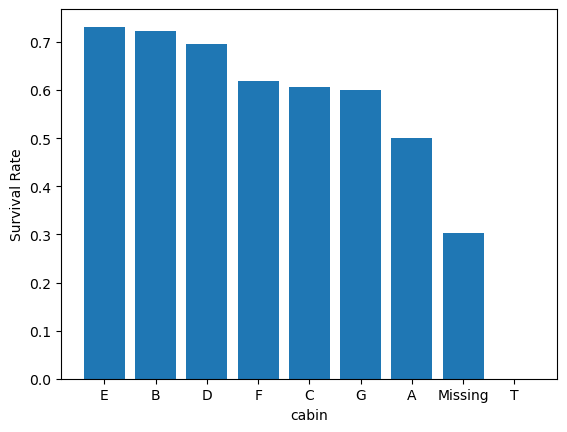

In [32]:
import seaborn as sns
plt.bar(x=tmp.index, height=tmp['mean'].values)
plt.ylabel('Survival Rate')
plt.xlabel('cabin');

### Determine the distribution of numerical variables

In [31]:
pt

,count,surv_rate
title,,
Mr,757,0.162483
Other,29,0.379310
Master,61,0.508197
Miss,262,0.679389
Mrs,200,0.785000


In [39]:
# omd 
pt = pd.pivot_table(data=data,
                    index='age',
                    columns='pclass',
                    values='survived',
                    aggfunc='mean')
# plt.bar(x=pt.index, height=pt.survived)
# plt.axhline(y=np.mean(data['survived']), color='orange', ls='--')
# plt.title('Survival Rate by Age');

In [43]:
pt.columns=['class1', 'class2', 'class3']
pt

,class1,class2,class3
age,,,
0.1667,NaN,NaN,1.000000
0.3333,NaN,NaN,0.000000
0.4167,NaN,NaN,1.000000
0.6667,NaN,1.0,NaN
0.7500,NaN,NaN,0.666667
...,...,...,...
70.5000,NaN,NaN,0.000000
71.0000,0.0,NaN,NaN
74.0000,NaN,NaN,0.000000


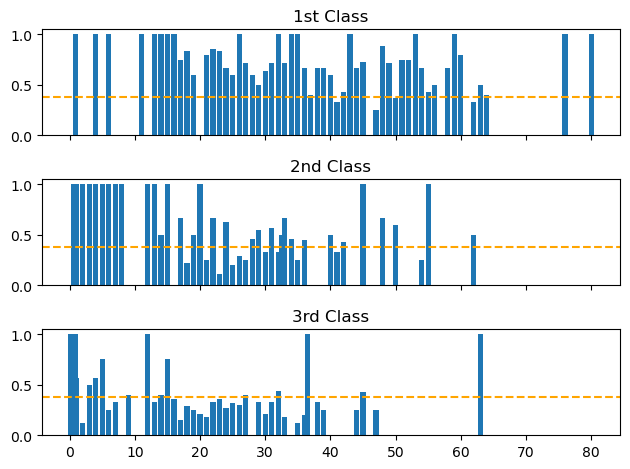

In [49]:
# omd 
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, sharex=True)
ax1.bar(x=pt.index, height=pt['class1'])
ax1.axhline(y=np.mean(data['survived']), color='orange', ls='--')
ax1.set_title('1st Class')

ax2.bar(x=pt.index, height=pt['class2'])
ax2.axhline(y=np.mean(data['survived']), color='orange', ls='--')
ax2.set_title('2nd Class')

ax3.bar(x=pt.index, height=pt['class3'])
ax3.axhline(y=np.mean(data['survived']), color='orange', ls='--')
ax3.set_title('3rd Class')

plt.tight_layout();

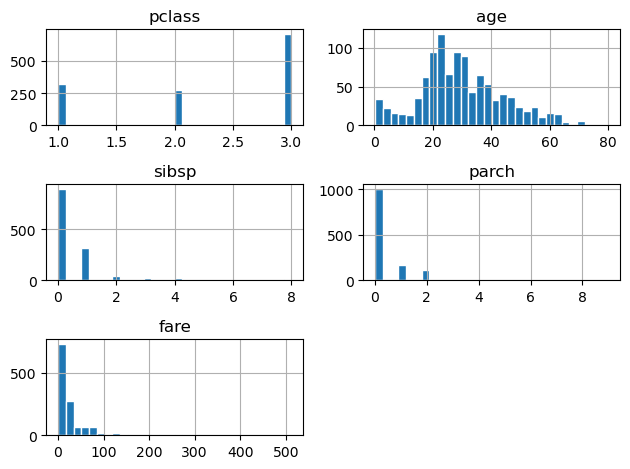

In [30]:
data[vars_num].hist(bins=30, ec='white')
plt.tight_layout();

## Separate data into train and test

Use the code below for reproducibility. Don't change it.

In [50]:
X_train, X_test, y_train, y_test = train_test_split(
    data.drop('survived', axis=1),  # predictors
    data['survived'],  # target
    test_size=0.2,  # percentage of obs in test set
    random_state=0)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((1047, 9), (262, 9))

## Feature Engineering

### Extract only the letter (and drop the number) from the variable Cabin

In [51]:
# omd
display(pd.DataFrame([i[:1] if pd.notna(i) else 'Missing' for i in data['cabin'] ]).value_counts())
X_train['cabin'] = X_train['cabin'].str[0]
X_test['cabin'] = X_test['cabin'].str[0]
print((X_train['cabin'].unique()))
print(X_test['cabin'].unique())

Missing    1014
C            94
B            65
D            46
E            41
A            22
F            21
G             5
T             1
Name: count, dtype: int64

[nan 'E' 'F' 'A' 'C' 'D' 'B' 'T' 'G']
[nan 'G' 'E' 'C' 'B' 'A' 'F' 'D']


### Fill in Missing data in numerical variables:

- Add a binary missing indicator
- Fill NA in original variable with the median

In [52]:
for var in vars_num_missing:
    # add missing indicator
    X_train[var+'_NA'] = np.where(X_train[var].isna(),1,0)
    X_test[var+'_NA'] = np.where(X_test[var].isna(),1,0)

    # replace NaN by median
    median_val = np.nanmedian(X_train['age'])
    # median_val = X_train['age'].median()    # alternatively

    X_train[var].fillna(median_val, inplace=True)
    X_test[var].fillna(median_val, inplace=True)
    
X_train[['age', 'fare']].isnull().sum()

age     0
fare    0
dtype: int64

In [57]:
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_NA,fare_NA
1118,3,male,25.0,0,0,7.9250,NaN,S,Mr,0,0
44,1,female,41.0,0,0,134.5000,E,C,Miss,0,0
1072,3,male,28.0,0,0,7.7333,NaN,Q,Mr,1,0
1130,3,female,18.0,0,0,7.7750,NaN,S,Miss,0,0
574,2,male,29.0,1,0,21.0000,NaN,S,Mr,0,0


In [96]:
def comparison(df, y, var):
    df1 = df.copy()
    df1['survived'] = y
    tmp = df1.groupby([var])['survived'].agg(['mean', 'std', 'count'])
    display(tmp)
    tmp.plot(kind='barh', y='mean', legend=False, title='Survival Rate', color='steelblue', figsize=(4, 3))
    plt.axvline(x=np.mean(y), color='orange', ls='--')
    plt.text(x=0.3, y=-.8, s="mean survival rate");

,mean,std,count
age_NA,,,
0,0.412604,0.492596,841
1,0.257282,0.438201,206


,mean,std,count
fare_NA,,,
0,0.382409,0.486208,1046
1,0.000000,NaN,1


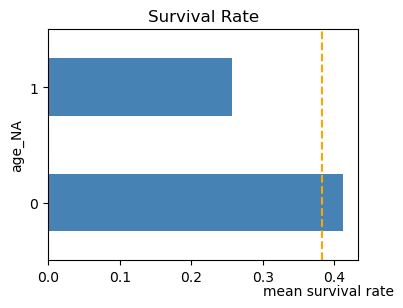

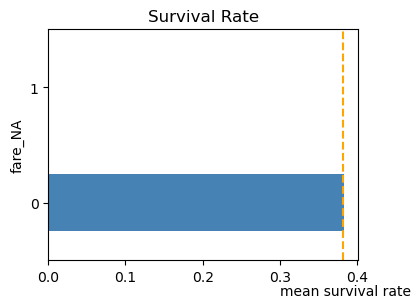

In [99]:
for var in ['age_NA', 'fare_NA']:
    comparison(X_train, y_train, var)

### Replace Missing data in categorical variables with the string **Missing**

In [78]:
X_train[vars_cat_missing] = X_train[vars_cat_missing].fillna('Missing')
X_test[vars_cat_missing] = X_test[vars_cat_missing].fillna('Missing')

In [79]:
X_train.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
age_NA      0
fare_NA     0
dtype: int64

In [80]:
X_test.isna().sum()

pclass      0
sex         0
age         0
sibsp       0
parch       0
fare        0
cabin       0
embarked    0
title       0
age_NA      0
fare_NA     0
dtype: int64

### Remove rare labels in categorical variables

- remove labels present in less than 5 % of the passengers

In [103]:
def find_frequent_labels(df, var, rare_perc):
    # function finds the labels that are shared by more than
    # a certain % of the passengers in the dataset
    df = df.copy()
    tmp = df.groupby(var)[var].count() / len(df)
    return tmp[tmp > rare_perc].index

In [107]:
for var in vars_cat:
    # find frequent categories
    frequent_ls = find_frequent_labels(X_train, var, 0.05)

    # replace rare categories by the string "Rare"
    X_train[var] = np.where(X_train[var].isin(frequent_ls), X_train[var], 'Rare')
    X_test[var] = np.where(X_test[var].isin(frequent_ls), X_test[var], 'Rare')

In [108]:
X_train[vars_cat].nunique()

sex         2
cabin       3
embarked    4
title       4
dtype: int64

In [109]:
X_test[vars_cat].nunique()

sex         2
cabin       3
embarked    3
title       4
dtype: int64

### Perform one hot encoding of categorical variables into k-1 binary variables

- k-1, means that if the variable contains 9 different categories, we create 8 different binary variables
- Remember to drop the original categorical variable (the one with the strings) after the encoding

In [110]:
# omd 
X_train.head()

,pclass,sex,age,sibsp,parch,fare,cabin,embarked,title,age_NA,fare_NA
1118,3,male,25.0,0,0,7.9250,Missing,S,Mr,0,0
44,1,female,41.0,0,0,134.5000,Rare,C,Miss,0,0
1072,3,male,28.0,0,0,7.7333,Missing,Q,Mr,1,0
1130,3,female,18.0,0,0,7.7750,Missing,S,Miss,0,0
574,2,male,29.0,1,0,21.0000,Missing,S,Mr,0,0


In [111]:
for var in vars_cat:
    # to create the binary variables, we use get_dummies from pandas
    X_train = pd.concat([X_train,
                         pd.get_dummies(X_train[var], prefix=var, drop_first=True)], axis=1)
    X_test = pd.concat([X_test,
                         pd.get_dummies(X_test[var], prefix=var, drop_first=True)], axis=1)

In [115]:
X_train.drop(columns=vars_cat, axis=1, inplace=True)
X_test.drop(columns=vars_cat, axis=1, inplace=True)
X_train.shape, X_test.shape

((1047, 16), (262, 15))

In [116]:
X_train.head()

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
1118,3,25.0,0,0,7.9250,0,0,1,1,0,0,0,1,1,0,0
44,1,41.0,0,0,134.5000,0,0,0,0,1,0,0,0,0,0,0
1072,3,28.0,0,0,7.7333,1,0,1,1,0,1,0,0,1,0,0
1130,3,18.0,0,0,7.7750,0,0,0,1,0,0,0,1,0,0,0
574,2,29.0,1,0,21.0000,0,0,1,1,0,0,0,1,1,0,0


In [117]:
X_test.head()

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare
1139,3,38.0,0,0,7.8958,0,0,1,1,0,0,1,1,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0
459,2,42.0,1,0,27.0000,0,0,1,1,0,0,1,1,0,0
1150,3,28.0,0,0,14.5000,1,0,1,1,0,0,1,1,0,0
393,2,25.0,0,0,31.5000,0,0,1,1,0,0,1,1,0,0


In [118]:
# we add 0 as values for all the observations, as Rare
# was not present in the test set

X_test['embarked_Rare'] = 0
X_test.head()

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_S,title_Mr,title_Mrs,title_Rare,embarked_Rare
1139,3,38.0,0,0,7.8958,0,0,1,1,0,0,1,1,0,0,0
533,2,21.0,0,1,21.0000,0,0,0,1,0,0,1,0,0,0,0
459,2,42.0,1,0,27.0000,0,0,1,1,0,0,1,1,0,0,0
1150,3,28.0,0,0,14.5000,1,0,1,1,0,0,1,1,0,0,0
393,2,25.0,0,0,31.5000,0,0,1,1,0,0,1,1,0,0,0


### Scale the variables

- Use the standard scaler from Scikit-learn

In [120]:
variables = X_train.columns.tolist()
variables

['pclass',
 'age',
 'sibsp',
 'parch',
 'fare',
 'age_NA',
 'fare_NA',
 'sex_male',
 'cabin_Missing',
 'cabin_Rare',
 'embarked_Q',
 'embarked_Rare',
 'embarked_S',
 'title_Mr',
 'title_Mrs',
 'title_Rare']

In [121]:
# create scaler
scaler = StandardScaler()

#  fit  the scaler to the train set
scaler.fit(X_train[variables]) 

# transform the train and test set
X_train = scaler.transform(X_train[variables])

X_test = scaler.transform(X_test[variables])

In [158]:
# omd
t = X_train.copy()
t = pd.DataFrame(t, columns=variables)
t

,pclass,age,sibsp,parch,fare,age_NA,fare_NA,sex_male,cabin_Missing,cabin_Rare,embarked_Q,embarked_Rare,embarked_S,title_Mr,title_Mrs,title_Rare
0,0.835808,-0.370162,-0.478911,-0.455423,-0.505067,-0.494921,-0.03092,0.761042,0.551235,-0.434076,-0.319539,-0.043748,0.639650,0.871587,-0.434076,-0.271746
1,-1.542157,0.904029,-0.478911,-0.455423,1.971424,-0.494921,-0.03092,-1.313987,-1.814107,2.303742,-0.319539,-0.043748,-1.563355,-1.147332,-0.434076,-0.271746
2,0.835808,-0.131251,-0.478911,-0.455423,-0.508817,2.020526,-0.03092,0.761042,0.551235,-0.434076,3.129507,-0.043748,-1.563355,0.871587,-0.434076,-0.271746
3,0.835808,-0.927621,-0.478911,-0.455423,-0.508001,-0.494921,-0.03092,-1.313987,0.551235,-0.434076,-0.319539,-0.043748,0.639650,-1.147332,-0.434076,-0.271746
4,-0.353174,-0.051614,0.434422,-0.455423,-0.249249,-0.494921,-0.03092,0.761042,0.551235,-0.434076,-0.319539,-0.043748,0.639650,0.871587,-0.434076,-0.271746
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1042,0.835808,-2.347810,0.434422,1.910970,-0.257564,-0.494921,-0.03092,-1.313987,0.551235,-0.434076,-0.319539,-0.043748,0.639650,-1.147332,-0.434076,-0.271746
1043,0.835808,-0.131251,-0.478911,-0.455423,-0.502621,2.020526,-0.03092,0.761042,0.551235,-0.434076,-0.319539,-0.043748,0.639650,0.871587,-0.434076,-0.271746
1044,0.835808,-0.131251,-0.478911,-0.455423,-0.508817,2.020526,-0.03092,-1.313987,0.551235,-0.434076,3.129507,-0.043748,-1.563355,-1.147332,-0.434076,-0.271746
1045,-0.353174,-0.768347,-0.478911,-0.455423,0.058906,-0.494921,-0.03092,-1.313987,0.551235,-0.434076,-0.319539,-0.043748,0.639650,-1.147332,-0.434076,-0.271746


In [123]:
X_train

array([[ 0.83580798, -0.37016209, -0.47891102, ...,  0.87158698,
        -0.43407632, -0.27174649],
       [-1.54215658,  0.90402864, -0.47891102, ..., -1.14733242,
        -0.43407632, -0.27174649],
       [ 0.83580798, -0.13125133, -0.47891102, ...,  0.87158698,
        -0.43407632, -0.27174649],
       ...,
       [ 0.83580798, -0.13125133, -0.47891102, ..., -1.14733242,
        -0.43407632, -0.27174649],
       [-0.3531743 , -0.7683467 , -0.47891102, ..., -1.14733242,
        -0.43407632, -0.27174649],
       [ 0.83580798,  0.18729636,  0.43442202, ..., -1.14733242,
         2.30374237, -0.27174649]])

## Train the Logistic Regression model

- Set the regularization parameter to 0.0005
- Set the seed to 0

In [124]:
# set up the model
# remember to set the random_state / seed

model = LogisticRegression(C=0.0005, random_state=0)

# train the model
model.fit(X_train, y_train)

LogisticRegression(C=0.0005, random_state=0)

## Make predictions and evaluate model performance

Determine:
- roc-auc
- accuracy

**Important, remember that to determine the accuracy, you need the outcome 0, 1, referring to survived or not. But to determine the roc-auc you need the probability of survival.**

In [125]:
# make predictions for test set
class_ = model.predict(X_train)
pred = model.predict_proba(X_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = model.predict(X_test)
pred = model.predict_proba(X_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.8436166924265842
train accuracy: 0.711556829035339

test roc-auc: 0.8352160493827161
test accuracy: 0.7022900763358778



That's it! Well done

**Keep this code safe, as we will use this notebook later on, to build production code, in our next assignement!!**

In [159]:
from xgboost import XGBClassifier

params = {
    'n_estimators':500,
    'max_depth':3,
    'learning_rate':0.1,
    'eval_metric': 'auc'
}
model_2 = XGBClassifier(**params)
model_2.fit(t, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='auc', feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=500, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [160]:
# make predictions for test set
class_ = model_2.predict(X_train)
pred = model_2.predict_proba(X_train)[:,1]

# determine mse and rmse
print('train roc-auc: {}'.format(roc_auc_score(y_train, pred)))
print('train accuracy: {}'.format(accuracy_score(y_train, class_)))
print()

# make predictions for test set
class_ = model_2.predict(X_test)
pred = model_2.predict_proba(X_test)[:,1]

# determine mse and rmse
print('test roc-auc: {}'.format(roc_auc_score(y_test, pred)))
print('test accuracy: {}'.format(accuracy_score(y_test, class_)))
print()

train roc-auc: 0.9721889489953631
train accuracy: 0.9063992359121299

test roc-auc: 0.8446604938271606
test accuracy: 0.8320610687022901

